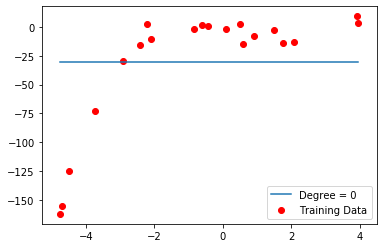

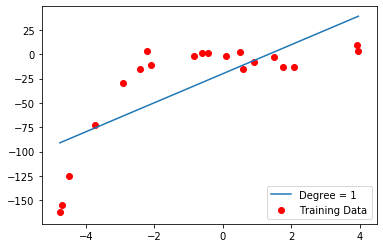

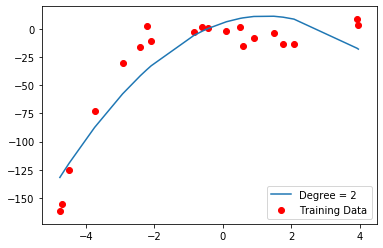

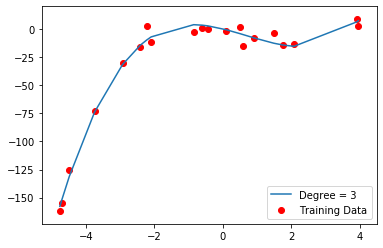

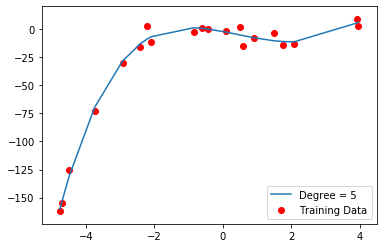

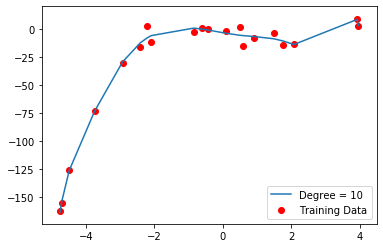

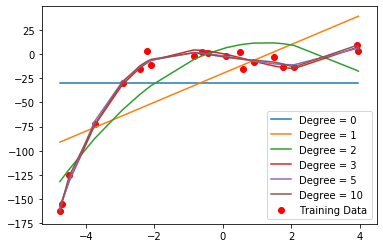

[53.9422640343115, 34.78092197374029, 19.91913277375473, 3.29200092341831, 2.440105049069443, 2.181673963845527]
[44.175903315611386, 32.809994683873605, 19.0167771356026, 4.739152687789994, 4.710795312498904, 3.998171595716612]


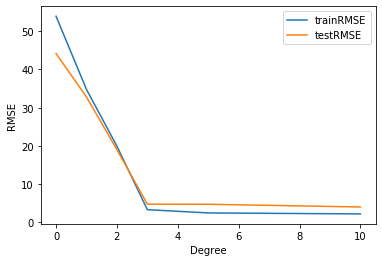

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import random

def main():
    dataset = pd.read_csv("CMP3751M_ML_Assignment 1_Task1 - dataset - pol_regression.csv", header=None)
    dataset = np.array(dataset)
    dataset = np.delete(dataset, 0, axis=0) #Remove the column headings 
    dataset = dataset.astype(np.float) #Convert from a string array to a float array
    dataset = dataset[:,1:] #Remove the first column (this is a column of index numbers not data)
    
    dataset = dataset[dataset[:,0].argsort()] #Sorted based on the first column (x values) so a line graph can be drawn later
    
    x = dataset[:,0]
    y = dataset[:,1]
    
    degrees = [0,1,2,3,5,10]
    
    #Regressing and plotting polynomials to the degrees contained in the degrees array
    for i in range(len(degrees)):
        plt.clf()
        weights, predictedY = pol_regression(x, y, degrees[i])
        plt.plot(x, predictedY)
        plt.scatter(x, y, color="red")
        plt.legend(("Degree = " + str(degrees[i]), "Training Data"), loc = 'lower right')
        plt.show()
        
    #Regressing and plotting one graph containing all of the polynomials
    plt.clf()
    for i in range(len(degrees)):
        weights, predictedY = pol_regression(x, y, degrees[i])
        plt.plot(x, predictedY)
    plt.scatter(x, y, color="red")
    plt.legend(("Degree = 0", "Degree = 1", "Degree = 2", "Degree = 3", "Degree = 5", "Degree = 10", "Training Data"), loc = 'lower right')
    plt.show()
    
    #Splitting the data into seperate test and train arrays
    testData = []
    trainData = np.copy(dataset)
    #Items are removed at random from the training set and placed into the testing set
    for i in range(int(len(trainData)*0.3)): #30% of the training data will be used as testing data
        randomItem = random.randint(0, len(trainData)-1)
        testData.append(dataset[randomItem])
        trainData = np.delete(trainData, randomItem, 0)  
    testData = np.array(testData)
    
    x_test = testData[:,0]
    y_test = testData[:,1]
    x_train = trainData[:,0]
    y_train = trainData[:,1]
    
    #Gathering RMSE values for test and train data and different degree values
    trainRMSE = []
    testRMSE = []
    for i in range(len(degrees)):
        weights, predictedY = pol_regression(x_train, y_train, degrees[i])
        trainRMSE.append(eval_pol_regression(weights, x_train, y_train, degrees[i]))
        testRMSE.append(eval_pol_regression(weights, x_test, y_test, degrees[i]))
        
    print(trainRMSE)
    print(testRMSE)
    
    #A graph that shows the effect of degree on Root Mean Square Error
    plt.clf()
    plt.plot(degrees, trainRMSE)
    plt.plot(degrees, testRMSE)
    plt.legend(("trainRMSE", "testRMSE"))
    plt.xlabel("Degree")
    plt.ylabel("RMSE")
    plt.show()

def pol_regression(features_train,  y_train, degree):
    #Implimentation of the least squares solution formula to calculate weights
    vanderVector = np.vander(features_train, degree+1)
    vanderTransposed = vanderVector.transpose()
    weights = (np.linalg.inv(vanderTransposed.dot(vanderVector))).dot(vanderTransposed).dot(y_train)
    #Use of the weights calculated to predict y values using the training x values
    predictedY = vanderVector.dot(weights)
    #The weights are returned to be used with testing x values
    #The predicted y values can be used to calculate RMSE with the actual y values
    return weights, predictedY
    
def eval_pol_regression(coeficients, x, y, degree):
    #To predict y values, x must be in the form of a vander vector
    vanderVector = np.vander(x, degree+1)
    #Y is predicted using the preiviously calculated coeficients and new x values 
    predictedY = vanderVector.dot(coeficients)
    #The predictions are evaluated by their Root Mean Square Error from the actual y value
    xMinusY = predictedY - y
    rmse = math.sqrt(sum(np.square(xMinusY))/len(y))
    return rmse
    




main()